In [1]:
import pandas as pd
df1 = pd.read_csv("mainSimulationAccessTraces.csv")

In [2]:
import seaborn as sns
import numpy as np

In [3]:
df1.shape

(357952, 13)

In [4]:
df1['normality'].unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

In [5]:
df1['normality'].nunique()

8

In [6]:
df1.head(100)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,0,1520031775971,normal
96,tempin6,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,write,19.6966,1520031778626,normal
97,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,write,19.6209,1520031778646,normal
98,tempin14,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,registerService,none,1520031781629,normal


In [7]:
df3=df1.copy(deep=True)

In [8]:
df3.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
median_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df3.iloc[:,8]=pd.DataFrame(median_mode.fit_transform(df3.iloc[:,8].values.reshape(-1,1)))

In [10]:
df3.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType                0
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

In [11]:
formean=df3[(df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@5c494e7d') 
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@181ae4a8') 
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@273343f8')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@699d52f5') 
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@463d9146') 
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@2c82b391')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@4ff97c45')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@715cced')
& (df3['value']!='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb')
& (df3['value']!='false') & (df3['value']!='true') & (df3['value']!='twenty') & (df3['value']!='none')]

In [12]:
pd.to_numeric(formean.iloc[:,10]).mean()

2775430897.5786676

In [13]:
from sklearn.impute import SimpleImputer
const_imp=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=2775430897.5786676)
df3.iloc[:,10]=pd.DataFrame(const_imp.fit_transform(df3.iloc[:,10].values.reshape(-1,1)))

In [14]:
df3.isnull().sum()

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64

In [15]:
ct=df3['value'].value_counts().to_dict()

In [16]:
ct['none']

106

In [17]:
bool('none' in df3['value'].unique())

True

In [18]:
df3['sourceID'].value_counts().to_dict()

{'washingmachine1': 17908,
 'washingmachine3': 17316,
 'battery4': 15023,
 'battery5': 14543,
 'battery1': 14499,
 'battery6': 14485,
 'battery2': 14482,
 'washingmachine2': 12762,
 'lightcontrol1': 8315,
 'battery3': 8241,
 'lightcontrol12': 7144,
 'lightcontrol14': 6474,
 'lightcontrol25': 6459,
 'lightcontrol10': 6414,
 'lightcontrol4': 6333,
 'lightcontrol3': 6327,
 'lightcontrol13': 6324,
 'lightcontrol2': 6324,
 'lightcontrol6': 6322,
 'lightcontrol11': 6315,
 'lightcontrol5': 6308,
 'lightcontrol21': 6300,
 'lightcontrol20': 6297,
 'lightcontrol22': 6296,
 'lightcontrol24': 6294,
 'lightcontrol23': 6288,
 'lightcontrol27': 6281,
 'lightcontrol28': 6281,
 'lightcontrol29': 6279,
 'lightcontrol26': 6278,
 'tempin13': 4620,
 'tempin14': 4546,
 'tempin27': 4450,
 'tempin28': 4430,
 'tempin20': 4236,
 'tempin23': 4235,
 'tempin21': 4234,
 'tempin29': 4231,
 'tempin22': 4230,
 'tempin24': 4229,
 'tempin26': 4229,
 'tempin25': 4228,
 'tempin3': 4168,
 'tempin1': 4167,
 'tempin4': 4165,

In [19]:
df3['value']=df3['value'].apply(lambda x:'2775430897.5786676' if x=='false' else x)

In [20]:
df3['value']=df3['value']=df3['value'].apply(lambda x:'2775430897.5786676' if x=='org.ds2os.vsl.core.utils.AddressParameters@5c494e7d' 
or x=='org.ds2os.vsl.core.utils.AddressParameters@181ae4a8' 
or x=='org.ds2os.vsl.core.utils.AddressParameters@273343f8'
or x=='org.ds2os.vsl.core.utils.AddressParameters@699d52f5' 
or x=='org.ds2os.vsl.core.utils.AddressParameters@463d9146' 
or x=='org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed'
or x=='org.ds2os.vsl.core.utils.AddressParameters@2c82b391'
or x=='org.ds2os.vsl.core.utils.AddressParameters@4ff97c45'
or x=='org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b'
or x=='org.ds2os.vsl.core.utils.AddressParameters@715cced'
or x=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb' else x)

In [21]:
df3['value']=df3['value']=df3['value'].apply(lambda x:'2775430897.5786676' if x=='true' else x)

In [22]:
df3['value']=df3['value']=df3['value'].apply(lambda x:'20' if x=='twenty' else x)

In [23]:
df3['sourceID'].value_counts().to_dict()

{'washingmachine1': 17908,
 'washingmachine3': 17316,
 'battery4': 15023,
 'battery5': 14543,
 'battery1': 14499,
 'battery6': 14485,
 'battery2': 14482,
 'washingmachine2': 12762,
 'lightcontrol1': 8315,
 'battery3': 8241,
 'lightcontrol12': 7144,
 'lightcontrol14': 6474,
 'lightcontrol25': 6459,
 'lightcontrol10': 6414,
 'lightcontrol4': 6333,
 'lightcontrol3': 6327,
 'lightcontrol13': 6324,
 'lightcontrol2': 6324,
 'lightcontrol6': 6322,
 'lightcontrol11': 6315,
 'lightcontrol5': 6308,
 'lightcontrol21': 6300,
 'lightcontrol20': 6297,
 'lightcontrol22': 6296,
 'lightcontrol24': 6294,
 'lightcontrol23': 6288,
 'lightcontrol27': 6281,
 'lightcontrol28': 6281,
 'lightcontrol29': 6279,
 'lightcontrol26': 6278,
 'tempin13': 4620,
 'tempin14': 4546,
 'tempin27': 4450,
 'tempin28': 4430,
 'tempin20': 4236,
 'tempin23': 4235,
 'tempin21': 4234,
 'tempin29': 4231,
 'tempin22': 4230,
 'tempin24': 4229,
 'tempin26': 4229,
 'tempin25': 4228,
 'tempin3': 4168,
 'tempin1': 4167,
 'tempin4': 4165,

In [24]:
top=['washingmachine1',
 'washingmachine3',
 'battery4',
 'battery5',
 'battery1',
 'battery6',
 'battery2',
 'washingmachine2',
 'lightcontrol1',
 'battery3',
 'lightcontrol12']

In [25]:
df4=df3.copy(deep=True)

In [26]:
df4['sourceID']=df4['sourceID'].apply(lambda x:'not_freq' if x not in top else x) 
df4

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,not_freq,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,not_freq,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,not_freq,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,not_freq,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,not_freq,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,2775430897.5786676,1520117997401,normal
357950,not_freq,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [27]:
sid_dummies=pd.get_dummies(df4['sourceID'])

In [28]:
sid_dummies

,battery1,battery2,battery3,battery4,battery5,battery6,lightcontrol1,lightcontrol12,not_freq,washingmachine1,washingmachine2,washingmachine3
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
357947,0,0,0,0,0,0,0,0,1,0,0,0
357948,0,0,0,0,0,0,0,0,0,0,1,0
357949,0,0,0,0,0,0,0,0,0,0,1,0
357950,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
df4.head(25)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,not_freq,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,not_freq,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,not_freq,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,not_freq,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
5,not_freq,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,registerService,none,1520031603464,normal
6,not_freq,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,BedroomParents,/agent2/movement2,/movementSensor,registerService,none,1520031603474,normal
7,not_freq,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,registerService,none,1520031603474,normal
8,not_freq,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,BedroomChildren,/agent1/tempin1,/sensorService,registerService,none,1520031603484,normal
9,not_freq,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1,/movementSensor,registerService,none,1520031604212,normal


In [30]:
df4['accessedNodeAddress'].value_counts().to_dict()


{'/agent11/battery4/charge': 19032,
 '/agent12/battery5/charge': 16531,
 '/agent5/battery1/charge': 16526,
 '/agent5/battery2/charge': 16494,
 '/agent12/battery6/charge': 16460,
 '/agent11/battery4/charging': 8611,
 '/agent6/tempin6': 8407,
 '/agent12/movement12/movement': 7124,
 '/agent5/battery1/charging': 6784,
 '/agent12/battery5/charging': 6748,
 '/agent5/battery2/charging': 6649,
 '/agent28/tempin28': 6552,
 '/agent1/tempin1': 6551,
 '/agent2/tempin2': 6550,
 '/agent12/battery6/charging': 6540,
 '/agent11/tempin11': 6512,
 '/agent3/tempin3': 6416,
 '/agent4/tempin4': 6414,
 '/agent23/tempin23': 6406,
 '/agent20/tempin20': 6405,
 '/agent21/tempin21': 6404,
 '/agent5/tempin5': 6401,
 '/agent22/tempin22': 6397,
 '/agent10/tempin10': 6397,
 '/agent13/tempin13': 6384,
 '/agent14/tempin14': 6370,
 '/agent29/tempin29': 6351,
 '/agent27/tempin27': 6350,
 '/agent24/tempin24': 6349,
 '/agent26/tempin26': 6347,
 '/agent25/tempin25': 6347,
 '/agent1/movement1/movement': 6293,
 '/agent4/batte

In [31]:
top2=['/agent11/battery4/charge',
 '/agent12/battery5/charge',
 '/agent5/battery1/charge',
 '/agent5/battery2/charge',
 '/agent12/battery6/charge',
 '/agent11/battery4/charging']

In [32]:
df4['accessedNodeAddress']=df4['accessedNodeAddress'].apply(lambda x:'not_freq_add' if x not in top2 else x)

In [33]:
df4['accessedNodeAddress'].value_counts().to_dict()

{'not_freq_add': 264298,
 '/agent11/battery4/charge': 19032,
 '/agent12/battery5/charge': 16531,
 '/agent5/battery1/charge': 16526,
 '/agent5/battery2/charge': 16494,
 '/agent12/battery6/charge': 16460,
 '/agent11/battery4/charging': 8611}

In [34]:
accessnodeadd_dummies=pd.get_dummies(df4['accessedNodeAddress'])

In [35]:
accessnodeadd_dummies

,/agent11/battery4/charge,/agent11/battery4/charging,/agent12/battery5/charge,/agent12/battery6/charge,/agent5/battery1/charge,/agent5/battery2/charge,not_freq_add
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
357947,0,0,0,0,0,0,1
357948,1,0,0,0,0,0,0
357949,0,1,0,0,0,0,0
357950,0,0,0,0,0,0,1


In [36]:
df4['operation'].value_counts().to_dict()

{'read': 248061,
 'write': 109648,
 'lockSubtree': 148,
 'registerService': 84,
 'subscribe': 11}

In [37]:
operation_dummies=pd.get_dummies(df4['operation'])
operation_dummies

,lockSubtree,read,registerService,subscribe,write
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
357947,0,1,0,0,0
357948,0,1,0,0,0
357949,0,1,0,0,0
357950,0,1,0,0,0


In [38]:
df4['value']=df4['value'].apply(lambda x:'1' if x=='none' else x)


In [39]:
df4['destinationServiceAddress'].value_counts().to_dict()

{'/agent11/battery4': 27644,
 '/agent5/battery1': 23311,
 '/agent12/battery5': 23280,
 '/agent5/battery2': 23144,
 '/agent12/battery6': 23001,
 '/agent4/battery3': 8745,
 '/agent6/tempin6': 8407,
 '/agent12/movement12': 7151,
 '/agent28/tempin28': 6552,
 '/agent1/tempin1': 6551,
 '/agent2/tempin2': 6550,
 '/agent11/tempin11': 6512,
 '/agent3/tempin3': 6416,
 '/agent4/tempin4': 6414,
 '/agent23/tempin23': 6406,
 '/agent20/tempin20': 6405,
 '/agent21/tempin21': 6404,
 '/agent5/tempin5': 6401,
 '/agent10/tempin10': 6397,
 '/agent22/tempin22': 6397,
 '/agent13/tempin13': 6384,
 '/agent14/tempin14': 6370,
 '/agent29/tempin29': 6351,
 '/agent27/tempin27': 6350,
 '/agent24/tempin24': 6349,
 '/agent25/tempin25': 6347,
 '/agent26/tempin26': 6347,
 '/agent1/movement1': 6312,
 '/agent14/movement14': 4364,
 '/agent10/movement10': 4302,
 '/agent4/movement4': 4223,
 '/agent21/movement21': 4221,
 '/agent24/movement24': 4221,
 '/agent22/movement22': 4219,
 '/agent6/movement6': 4217,
 '/agent20/movemen

In [40]:
top3=['/agent11/battery4',
 '/agent5/battery1',
 '/agent12/battery5',
 '/agent5/battery2',
 '/agent12/battery6',
 '/agent4/battery3',
 '/agent6/tempin6',
 '/agent12/movement12',
 '/agent28/tempin28',
 '/agent1/tempin1',
 '/agent2/tempin2',
 '/agent11/tempin11',
 '/agent3/tempin3',
 '/agent4/tempin4']

In [41]:
df4['destinationServiceAddress']=df4['destinationServiceAddress'].apply(lambda x:'not_freq_dest_add' if x not in top3 else x)

In [42]:
destadd_dummies=pd.get_dummies(df4['destinationServiceAddress'])

In [43]:
df4=pd.concat([df4,sid_dummies],axis=1)

In [44]:
df4=pd.concat([df4,operation_dummies],axis=1)

In [45]:
df4=pd.concat([df4,destadd_dummies],axis=1)

In [46]:
df4.drop(['sourceID','sourceAddress','sourceType','sourceLocation','destinationServiceAddress','destinationServiceType','destinationLocation'],axis=1,inplace=True)

In [47]:
df4.drop(['accessedNodeAddress','accessedNodeType','operation'],axis=1,inplace=True)

In [48]:
df4['normality'].value_counts().to_dict()

{'normal': 347935,
 'anomalous(DoSattack)': 5780,
 'anomalous(scan)': 1547,
 'anomalous(malitiousControl)': 889,
 'anomalous(malitiousOperation)': 805,
 'anomalous(spying)': 532,
 'anomalous(dataProbing)': 342,
 'anomalous(wrongSetUp)': 122}

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
df4.normality=le.fit_transform(df4.normality)
df4

,value,timestamp,normality,battery1,battery2,battery3,battery4,battery5,battery6,lightcontrol1,...,/agent12/movement12,/agent2/tempin2,/agent28/tempin28,/agent3/tempin3,/agent4/battery3,/agent4/tempin4,/agent5/battery1,/agent5/battery2,/agent6/tempin6,not_freq_dest_add
0,1,1520031600000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1520031603269,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1520031603279,7,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1520031603290,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1520031603464,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,20.3479,1520117997001,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
357948,9,1520117997339,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357949,2775430897.5786676,1520117997401,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357950,0,1520117998907,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='normality', ylabel='count'>

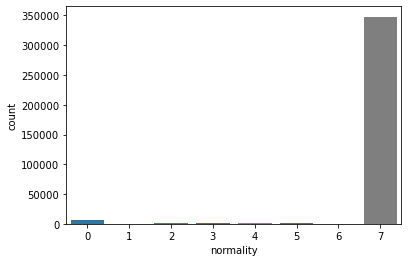

In [52]:
sns.countplot(x='normality',data=df4)

In [53]:
df4['normality'].value_counts().to_dict()


{7: 347935, 0: 5780, 4: 1547, 2: 889, 3: 805, 5: 532, 1: 342, 6: 122}

In [54]:
x=df4.drop(['normality'],axis=1)
x

,value,timestamp,battery1,battery2,battery3,battery4,battery5,battery6,lightcontrol1,lightcontrol12,...,/agent12/movement12,/agent2/tempin2,/agent28/tempin28,/agent3/tempin3,/agent4/battery3,/agent4/tempin4,/agent5/battery1,/agent5/battery2,/agent6/tempin6,not_freq_dest_add
0,1,1520031600000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1520031603269,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1520031603279,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1520031603290,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1520031603464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,20.3479,1520117997001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
357948,9,1520117997339,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357949,2775430897.5786676,1520117997401,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357950,0,1520117998907,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
y=df4['normality']

In [56]:
y

0         7
1         7
2         7
3         7
4         7
         ..
357947    7
357948    7
357949    7
357950    7
357951    7
Name: normality, Length: 357952, dtype: int32

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
ros=RandomOverSampler()

In [59]:
from collections import Counter

In [60]:
x_ros,y_ros=ros.fit_resample(x,y)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
x=sc.fit_transform(x_ros)

In [64]:
y=y_ros

In [65]:
Counter(y_ros)

Counter({7: 347935,
         4: 347935,
         3: 347935,
         0: 347935,
         5: 347935,
         1: 347935,
         6: 347935,
         2: 347935})

In [81]:
x

array([[-0.05060577, -1.61162382, -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945],
       [-0.05060577, -1.61149761, -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945],
       [-0.05060577, -1.61149723, -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945],
       ...,
       [-0.05060577, -1.0203045 , -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945],
       [-0.05060577, -1.00618128, -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945],
       [-0.05060577, -0.9870754 , -0.07236175, ..., -0.1894049 ,
        -0.22246842,  0.74522945]])

In [79]:
df4.shape

(357952, 35)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69853
           1       1.00      1.00      1.00     69627
           2       1.00      1.00      1.00     69323
           3       1.00      1.00      1.00     69186
           4       1.00      1.00      1.00     69763
           5       1.00      1.00      1.00     69785
           6       1.00      1.00      1.00     69585
           7       1.00      1.00      1.00     69574

    accuracy                           1.00    556696
   macro avg       1.00      1.00      1.00    556696
weighted avg       1.00      1.00      1.00    556696

[[69853     0     0     0     0     0     0     0]
 [    0 69627     0     0     0     0     0     0]
 [    0     0 69323     0     0     0     0     0]
 [    0     0     0 69186     0     0     0     0]
 [    0     0     0     0 69763     0     0     0]
 [    0     0     0     0     0 69785     0     0]
 [    0     0     0     0     0     0 69585

In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

Accuracy: 0.9996838489947835


In [74]:
from sklearn import tree


[Text(190.7303299265047, 217.13201133144474, 'X[15] <= -0.168\ngini = 0.875\nsamples = 2226784\nvalue = [278082, 278308, 278612, 278749, 278172, 278150, 278350\n278361]'),
 Text(150.7716280825365, 216.51603399433426, 'X[1] <= 0.807\ngini = 0.731\nsamples = 930111\nvalue = [0, 278308, 263902, 278749, 22851, 0, 0, 86301]'),
 Text(108.54514657775542, 215.9000566572238, 'X[26] <= 1.609\ngini = 0.607\nsamples = 566440\nvalue = [0, 244289, 4101, 250191, 5487, 0, 0, 62372]'),
 Text(73.59555234021138, 215.2840793201133, 'X[12] <= 2.309\ngini = 0.547\nsamples = 401338\nvalue = [0, 81611, 4101, 250191, 5487, 0, 0, 59948]'),
 Text(56.709172118772024, 214.66810198300283, 'X[1] <= -0.136\ngini = 0.348\nsamples = 318356\nvalue = [0, 0, 4101, 250191, 5487, 0, 0, 58577]'),
 Text(41.133895319577256, 214.05212464589235, 'X[1] <= -1.322\ngini = 0.25\nsamples = 286503\nvalue = [0, 0, 0, 245422, 5487, 0, 0, 35594]'),
 Text(30.75037745344741, 213.43614730878187, 'X[11] <= 2.388\ngini = 0.495\nsamples = 1217

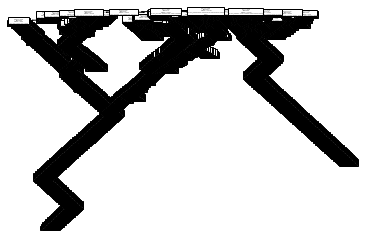

In [78]:
tree.plot_tree(dt)